In [1]:
%matplotlib inline


Datasets & DataLoaders
===================




PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.


Loading a Dataset
-------------------
PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset: `torchvision.datasets`, `torchtext.datasets` and `torchaudio.datasets`.

Here is an example of how to load the Fashion-MNIST dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the `FashionMNIST Dataset <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=None,
)

In [2]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train

In [3]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test

Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



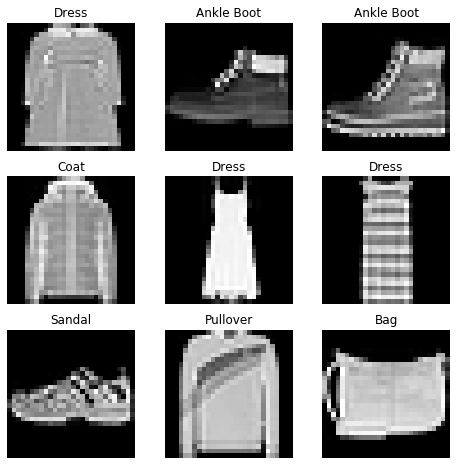

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

..
 .. figure:: /_static/img/basics/fashion_mnist.png
   :alt: fashion_mnist



--------------




Creating a Custom Dataset for your files
---------------------------------------------------

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.


In [6]:
import os
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):  
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        # load the files 
        filenames = []
        labels = []
        for filename in os.listdir(img_dir):
            filenames.append(filename)
            if filename.startswith("bird"):
                labels.append(0)
            elif filename.startswith("cat"):
                labels.append(1)
            elif filename.startswith("dog"):
                labels.append(2)
        self.filenames = filenames
        self.labels = labels

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.filenames[idx])
        image = Image.open(img_path)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [13]:
from torchvision.transforms import Resize, ToTensor, Compose

pet_dataset = CustomImageDataset("./data/pets", transform = Compose([Resize((32,32)), ToTensor()]))
# pet_dataset = CustomImageDataset("./data/pets", transform = ToTensor()) 

In [14]:
pet_dataset[1]

(tensor([[[0.8118, 0.8314, 0.8471,  ..., 0.8706, 0.8706, 0.8745],
          [0.8157, 0.8353, 0.8510,  ..., 0.8706, 0.8745, 0.8824],
          [0.8235, 0.8431, 0.8510,  ..., 0.8745, 0.8784, 0.8824],
          ...,
          [0.8353, 0.8510, 0.8627,  ..., 0.8941, 0.8941, 0.8941],
          [0.8353, 0.8549, 0.8667,  ..., 0.8980, 0.8980, 0.9020],
          [0.8353, 0.8549, 0.8745,  ..., 0.9059, 0.9098, 0.9098]],
 
         [[0.3569, 0.3765, 0.3922,  ..., 0.4235, 0.4235, 0.4275],
          [0.3608, 0.3804, 0.3961,  ..., 0.4235, 0.4275, 0.4353],
          [0.3686, 0.3882, 0.3961,  ..., 0.4275, 0.4314, 0.4353],
          ...,
          [0.3804, 0.3961, 0.4078,  ..., 0.4667, 0.4667, 0.4667],
          [0.3804, 0.4000, 0.4118,  ..., 0.4824, 0.4824, 0.4784],
          [0.3804, 0.4000, 0.4196,  ..., 0.4902, 0.4941, 0.4863]],
 
         [[0.5490, 0.5686, 0.5843,  ..., 0.6235, 0.6235, 0.6275],
          [0.5529, 0.5725, 0.5882,  ..., 0.6235, 0.6275, 0.6353],
          [0.5608, 0.5804, 0.5882,  ...,

type of the image:  <class 'torch.Tensor'>
label: 2


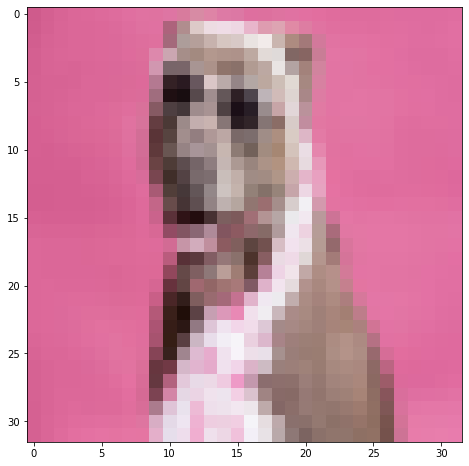

In [15]:
from torchvision.transforms import ToPILImage

raw_image, label = pet_dataset[1]
figure = plt.figure(figsize=(8, 8))
print("type of the image: ", type(raw_image))
if type(raw_image) == torch.Tensor:
    plt.imshow(ToPILImage()(raw_image))
else:
    plt.imshow(raw_image)
    
print(f"label: {label}")

In [16]:
raw_image.shape

torch.Size([3, 32, 32])

Preparing your data for training with DataLoaders
-------------------------------------------------
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [17]:
from torch.utils.data import DataLoader

pet_dataloader = DataLoader(pet_dataset, batch_size=12, shuffle=True)

Iterate through the DataLoader
--------------------------

In [18]:
for feature, label in pet_dataloader:
    print(f"Feature batch shape: {feature.size()}")
    print(label)

Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1])


Feature batch shape: torch.Size([12, 3, 32, 32])
Labels batch shape: torch.Size([12])


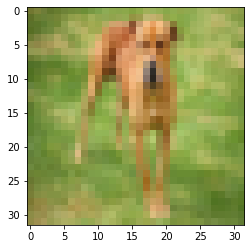

Label: 2


In [19]:
# Display image and label.
train_features, train_labels = next(iter(pet_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = ToPILImage()(train_features[0])
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [21]:
train_features

tensor([[[[0.4471, 0.4824, 0.4314,  ..., 0.6039, 0.5804, 0.5412],
          [0.3686, 0.4118, 0.4118,  ..., 0.6078, 0.5294, 0.5137],
          [0.3569, 0.3569, 0.3686,  ..., 0.6784, 0.6118, 0.5451],
          ...,
          [0.5176, 0.5647, 0.6039,  ..., 0.3529, 0.3765, 0.3216],
          [0.5490, 0.5922, 0.5961,  ..., 0.3804, 0.3843, 0.3569],
          [0.5647, 0.6196, 0.6549,  ..., 0.4118, 0.4157, 0.3804]],

         [[0.4667, 0.5098, 0.4902,  ..., 0.6471, 0.6275, 0.6157],
          [0.4353, 0.4902, 0.4980,  ..., 0.6745, 0.6157, 0.5961],
          [0.4431, 0.4549, 0.4824,  ..., 0.7059, 0.6745, 0.6314],
          ...,
          [0.5020, 0.5176, 0.5529,  ..., 0.4745, 0.4863, 0.4510],
          [0.5490, 0.5647, 0.5529,  ..., 0.4902, 0.4902, 0.4706],
          [0.5412, 0.5608, 0.6039,  ..., 0.5137, 0.5216, 0.4824]],

         [[0.1922, 0.2235, 0.2196,  ..., 0.3098, 0.2941, 0.2824],
          [0.1569, 0.1961, 0.2157,  ..., 0.3412, 0.2784, 0.2627],
          [0.1647, 0.1647, 0.1922,  ..., 0